In [1]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from library import *
nnfs.init()

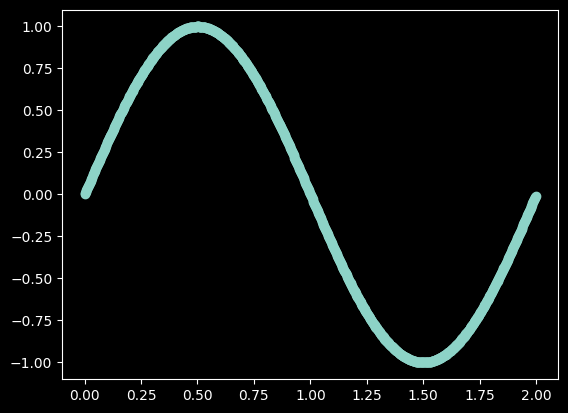

In [2]:
X = []
y = []
intensity = 499
for i in range (0,2*intensity):
    X.append(np.array([i/intensity]))
for i in X:
    y.append(np.sin(3.14 * i[0]))
X = np.array(X)
y = np.array(y)
plt.style.use('dark_background')
plt.scatter(X, y)
plt.show()

In [3]:
def predict(NN, name = "Neural Network", intensity = 130, area:tuple[int] = (np.amin(X)-0.05,np.amax(X)+0.05)):
    plt.title(name)
    plt.style.use('dark_background')
    x1, x2 = area
    predX = []
    n=intensity
    for i in range (int(n * (x2-x1))):
        predX.append(np.array([i/n+x1]))
    predX = np.array(predX)

    output = NN(predX)
    plt.scatter(predX, output, c="red")
    plt.scatter(X, y, c="green")
    plt.show()

In [4]:
myNN = Network(MeanSquaredError(), SGD())
myNN.addLayer(Layer_Dense(1, 8, ReLU()))
myNN.addLayer(Layer_Dense(8, 1, None))

print(myNN.run(np.array([[3],[1]])))
myNN.run(X)
print("Loss:\t"+ str(myNN.calcLoss(y)))
print("Accuracy:\t"+ str(myNN.calcAccuracy(y)))

[[0.00156752]
 [0.00052251]]
Loss:	498254.9432580332
Accuracy:	0.001002004008016032


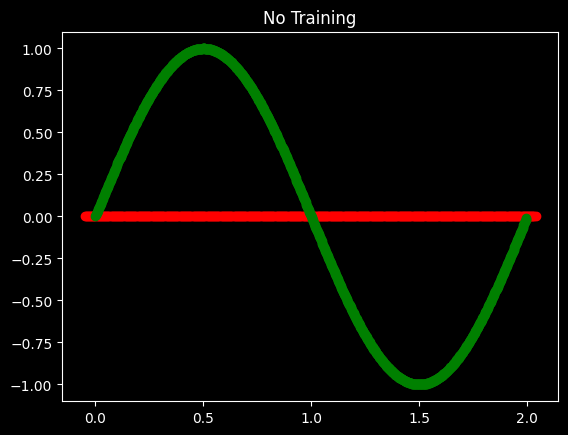

In [5]:
predict(myNN, "No Training", 200)

In [6]:
Y = [[i] for i in y]
myNN.run(X)
print(myNN.output[:5])
print(Y[:5])
print((myNN.output-Y)[:5])
'''
myNN.optimize(X,y,2001, 1000,0.1)
myNN.run(X)
print("ACC:\t"+str(myNN.calcAccuracy(y)))
print(f"Loss:\t{myNN.calcLoss(y):.3f}")

predict(myNN, "Backpropagation")'''

[[0.0000000e+00]
 [1.0471069e-06]
 [2.0942139e-06]
 [3.1413210e-06]
 [4.1884277e-06]]
[[0.0], [0.006292543642897075], [0.012584838123105724], [0.018876634287803493], [0.02516768300389947]]
[[ 0.        ]
 [-0.0062915 ]
 [-0.01258274]
 [-0.01887349]
 [-0.02516349]]


'\nmyNN.optimize(X,y,2001, 1000,0.1)\nmyNN.run(X)\nprint("ACC:\t"+str(myNN.calcAccuracy(y)))\nprint(f"Loss:\t{myNN.calcLoss(y):.3f}")\n\npredict(myNN, "Backpropagation")'

In [7]:
myNN.optimize(X,y,2001, 1000,0.1)
myNN.run(X)
print("ACC:\t"+str(myNN.calcAccuracy(y)))
print(f"Loss:\t{myNN.calcLoss(y):.3f}")

(998, 998)
1


ValueError: shapes (998,998) and (1,8) not aligned: 998 (dim 1) != 1 (dim 0)